In [1]:
#Copied from usage notebook
from astropy import units as u
import matplotlib.pyplot as plt
from snewpy.models import presn, ccsn
import numpy as np

from snewpy import snowglobes

SNOwGLoBES_path = None  # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "../../models/"  # directory containing SNEWPY models

/Users/jost/opt/anaconda3/envs/snews/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
#Set general parameters
distance = 0.15
detector = "wc100kt30prct"
modeltype_O = 'Odrzywolek_2010'
modeltype_P = 'Patton_2017'

# set desired flavor transformation
transformation = 'AdiabaticMSW_NMO'
transformation_INV = 'AdiabaticMSW_IMO'

# 10 hours before collapse
tstart = -36000 * u.s
tend = 0.0 * u.s

In [18]:
#Odrzywolek 15 solar masses
model = 's15_nuebar_data'
modelfile = SNEWPY_models_base + "presn-models/models/" + modeltype_O + "/" + model + '.txt'

#Normal mass
outfile_O = modeltype_O+"_"+model+"_"+transformation

#Inverted mass
outfile_O_INV = modeltype_O +"_"+model+"_"+transformation_INV

In [19]:
#Patton 15 solar masses normal mass
model_P = 'totalLuminosity_15SolarMass'
modelfile_P = SNEWPY_models_base + "presn-models/models/" + modeltype_P + "/" + model_P + '.dat'

#Normal mass
outfile_P = modeltype_P +"_"+model_P+"_"+transformation

#Inverted mass
outfile_P_INV = modeltype_P +"_"+model_P+"_"+transformation_INV

In [20]:
#Generate Patton normal
print("Preparing fluences ...")
tarredfile_P = snowglobes.generate_fluence(modelfile_P, modeltype_P, transformation, distance, outfile_P, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_P, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_P = snowglobes.collate(SNOwGLoBES_path, tarredfile_P, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...
Collating results ...


In [21]:
#Generate Patton inverted
print("Preparing fluences ...")
tarredfile_P_INV = snowglobes.generate_fluence(modelfile_P, modeltype_P, transformation_INV, distance, outfile_P_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_P_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_P_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_P_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...
Collating results ...


In [22]:
#Generate Odrzywolek normal
print("Preparing fluences ...")
tarredfile = snowglobes.generate_fluence(modelfile, modeltype_O, transformation, distance, outfile_O, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...
Collating results ...


In [23]:
#Generate Odrzywolek inverted
print("Preparing fluences ...")
tarredfile_INV = snowglobes.generate_fluence(modelfile, modeltype_O, transformation_INV, distance, outfile_O_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...
Collating results ...


In [24]:
#Find keys
print(list(tables_P_INV.keys()))

['wc100kt30prct', 'Collated_Patton_2017_totalLuminosity_15SolarMass_AdiabaticMSW_IMO_wc100kt30prct_events_smeared_weighted.dat', 'Collated_Patton_2017_totalLuminosity_15SolarMass_AdiabaticMSW_IMO_wc100kt30prct_events_unsmeared_weighted.dat']


In [27]:
#KEYS
key_O = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_wc100kt30prct_events_unsmeared_weighted.dat'
key_O_INV = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_IMO_wc100kt30prct_events_unsmeared_weighted.dat'
key_P = 'Collated_Patton_2017_totalLuminosity_15SolarMass_AdiabaticMSW_NMO_wc100kt30prct_events_unsmeared_weighted.dat'
key_P_INV = 'Collated_Patton_2017_totalLuminosity_15SolarMass_AdiabaticMSW_IMO_wc100kt30prct_events_unsmeared_weighted.dat'

In [28]:

print(f"Energy bins (in MeV):\n{tables[key_O]['data'][0][:12]}")

for i, channel in enumerate(tables[key_O]['header'].split()[1:]):

    print(f"Number of {channel} events in those energy bins:\n{tables[key_O]['data'][i+1][:12]}")

Energy bins (in MeV):
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Number of ibd events in those energy bins:
[   0.            0.            0.          534.99661961 1037.98895711
 1014.53463704  735.51366835  451.50254964  250.61833505  129.37189435
   63.44956456   30.37507747]
Number of nue_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nuebar_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nc events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of e events in those energy bins:
[ 286.64201125 1403.22584291 2082.19906277 1828.79141538 1212.38140336
  680.57348514  341.14892556  160.0741295    71.09841258   30.80450873
   12.97057188    5.43236472]


In [29]:

print(f"Energy bins (in MeV):\n{tables_P[key_P]['data'][0][:12]}")

for i, channel in enumerate(tables_P[key_P]['header'].split()[1:]):

    print(f"Number of {channel} events in those energy bins:\n{tables_P[key_P]['data'][i+1][:12]}")

Energy bins (in MeV):
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Number of ibd events in those energy bins:
[   0.            0.            0.          557.10041117 1158.74839693
 1141.70276199  811.27104038  516.18557582  285.29892136  134.36231828
   61.55346679   29.22879212]
Number of nue_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nuebar_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nc events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of e events in those energy bins:
[ 176.66304927 1081.68547266 1796.19733208 1766.41767306 1305.01580167
  796.84363925  441.47245442  236.65768748  119.35883184   56.97481425
   27.1670142    13.24734126]


events_ibd_P = array([   0.        ,    0.        ,    0.        ,  557.10041117,
       1158.74839693, 1141.70276199,  811.27104038,  516.18557582,
        285.29892136,  134.36231828,   61.55346679,   29.22879212])


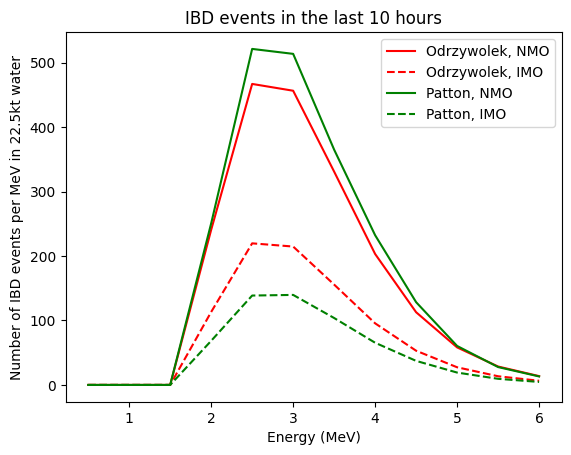

In [38]:
#ODRZYWOLEK NORMAL
table_O = tables[key_O]['data']

energy_bins_O = table_O[0][:12] 
ibd_channel_idx = None
for idx, channel in enumerate(tables[key_O]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx = idx + 1
        break

events_ibd_O = table_O[ibd_channel_idx][:12]
events_SK_O = np.array(events_ibd_O) * 0.225 * 2 # Factor 2 shows per MeV, instead of per 0.5 MeV bin

#ODRZYWOLEK INVERTED
table_O_INV = tables_INV[key_O_INV]['data']

energy_bins_O_INV = table_O_INV[0][:12] 
ibd_channel_idx_INV = None
for idx, channel in enumerate(tables_INV[key_O_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_INV = idx + 1
        break

events_ibd_O_INV = table_O_INV[ibd_channel_idx_INV][:12]
events_SK_O_INV = np.array(events_ibd_O_INV) * 0.225 * 2 # Factor 2 shows per MeV, instead of per 0.5 MeV bin

#PATTON INVERTED
table_P_INV = tables_P_INV[key_P_INV]['data']

energy_bins_INV = table_P_INV[0][:12] 
ibd_channel_idx_P_INV = None
for idx, channel in enumerate(tables_P_INV[key_P_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_P_INV = idx + 1
        break

events_ibd_P_INV = table_P_INV[ibd_channel_idx_P_INV][:12]
events_SK_P_INV = np.array(events_ibd_P_INV) * 0.225 * 2 # Factor 2 shows per MeV, instead of per 0.5 MeV bin

#PATTON NORMAL
table_P = tables_P[key_P]['data']

energy_bins_P = table_P[0][:12] 
ibd_channel_idx_P = None
for idx, channel in enumerate(tables_P[key_P]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_P = idx + 1
        break

events_ibd_P = table_P[ibd_channel_idx_P][:12]
events_SK_P = np.array(events_ibd_P) * 0.225 * 2 # Factor 2 shows per MeV, instead of per 0.5 MeV bin

print(f"{events_ibd_P = }")

plt.title('IBD events in the last 10 hours')
plt.plot(energy_bins_O, events_SK_O, 'r-', label = 'Odrzywolek, NMO')
plt.plot(energy_bins_O, events_SK_O_INV, 'r--', label = 'Odrzywolek, IMO')
plt.plot(energy_bins_O, events_SK_P, 'g-', label='Patton, NMO')
plt.plot(energy_bins_O, events_SK_P_INV, 'g--', label='Patton, IMO')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of IBD events per MeV in 22.5kt water')
plt.show()
